# **스마트폰 센서 데이터 기반 모션 분류**
# 단계 1: 탐색적 데이터 분석

## 환경설정

* 구글 드라이브 바로 밑에 새 폴더를 만들고 데이터 파일 넣기

In [ ]:
# 구글 드라이브 연결
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
path = '/content/drive/MyDrive/miniproject1/'

In [ ]:
# 라이브러리 로딩
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import joblib

In [ ]:
# 데이터 로딩
df_train = pd.read_csv(path + 'data01_train.csv')
df_test = pd.read_csv(path + 'data01_test.csv')
df_features = pd.read_csv(path + 'features.csv')

In [ ]:
# 불필요한 컬럼 제거
df_train.drop('subject', axis=1, inplace=True)
df_test.drop('subject', axis=1, inplace=True)

## EDA
* 세부 요구사항
    * 데이터의 형태, 기초통계량, 정보 등을 확인합니다.
    * target인 'Activity'에 대해 단변량 분석을 수행합니다.
    * feature 이름에 대한 계층 구조별로 변수의 개수를 확인합니다.

In [ ]:
# 전체 데이터 크기 확인
print("Train shape:", df_train.shape)
print("Test shape:", df_test.shape)

Train shape: (5881, 562)
Test shape: (1471, 562)


In [ ]:
# 전체 데이터 상위 5개 행 확인
print("Train head:")
display(df_train.head())
print("\nTest head:")
display(df_test.head())

Train head:


,tBodyAcc-mean()-X,tBodyAcc-mean()-Y,tBodyAcc-mean()-Z,tBodyAcc-std()-X,tBodyAcc-std()-Y,tBodyAcc-std()-Z,tBodyAcc-mad()-X,tBodyAcc-mad()-Y,tBodyAcc-mad()-Z,tBodyAcc-max()-X,...,fBodyBodyGyroJerkMag-skewness(),fBodyBodyGyroJerkMag-kurtosis(),"angle(tBodyAccMean,gravity)","angle(tBodyAccJerkMean),gravityMean)","angle(tBodyGyroMean,gravityMean)","angle(tBodyGyroJerkMean,gravityMean)","angle(X,gravityMean)","angle(Y,gravityMean)","angle(Z,gravityMean)",Activity
0,0.288508,-0.009196,-0.103362,-0.988986,-0.962797,-0.967422,-0.989000,-0.962596,-0.965650,-0.929747,...,-0.487737,-0.816696,-0.042494,-0.044218,0.307873,0.072790,-0.601120,0.331298,0.165163,STANDING
1,0.265757,-0.016576,-0.098163,-0.989551,-0.994636,-0.987435,-0.990189,-0.993870,-0.987558,-0.937337,...,-0.237820,-0.693515,-0.062899,0.388459,-0.765014,0.771524,0.345205,-0.769186,-0.147944,LAYING
2,0.278709,-0.014511,-0.108717,-0.997720,-0.981088,-0.994008,-0.997934,-0.982187,-0.995017,-0.942584,...,-0.535287,-0.829311,0.000265,-0.525022,-0.891875,0.021528,-0.833564,0.202434,-0.032755,STANDING
3,0.289795,-0.035536,-0.150354,-0.231727,-0.006412,-0.338117,-0.273557,0.014245,-0.347916,0.008288,...,-0.004012,-0.408956,-0.255125,0.612804,0.747381,-0.072944,-0.695819,0.287154,0.111388,WALKING
4,0.394807,0.034098,0.091229,0.088489,-0.106636,-0.388502,-0.010469,-0.109680,-0.346372,0.584131,...,-0.157832,-0.563437,-0.044344,-0.845268,-0.974650,-0.887846,-0.705029,0.264952,0.137758,WALKING_DOWNSTAIRS



Test head:


,tBodyAcc-mean()-X,tBodyAcc-mean()-Y,tBodyAcc-mean()-Z,tBodyAcc-std()-X,tBodyAcc-std()-Y,tBodyAcc-std()-Z,tBodyAcc-mad()-X,tBodyAcc-mad()-Y,tBodyAcc-mad()-Z,tBodyAcc-max()-X,...,fBodyBodyGyroJerkMag-skewness(),fBodyBodyGyroJerkMag-kurtosis(),"angle(tBodyAccMean,gravity)","angle(tBodyAccJerkMean),gravityMean)","angle(tBodyGyroMean,gravityMean)","angle(tBodyGyroJerkMean,gravityMean)","angle(X,gravityMean)","angle(Y,gravityMean)","angle(Z,gravityMean)",Activity
0,0.284379,-0.021981,-0.116683,-0.992490,-0.979640,-0.963321,-0.992563,-0.977304,-0.958142,-0.938850,...,-0.509523,-0.850065,-0.018043,0.092304,0.074220,-0.714534,-0.671943,-0.018351,-0.185733,SITTING
1,0.277440,-0.028086,-0.118412,-0.996620,-0.927676,-0.972294,-0.997346,-0.931405,-0.971788,-0.939837,...,-0.210792,-0.613367,-0.022456,-0.155414,0.247498,-0.112257,-0.826816,0.184489,-0.068699,STANDING
2,0.305833,-0.041023,-0.087303,0.006880,0.182800,-0.237984,0.005642,0.028616,-0.236474,0.016311,...,0.579587,0.394388,-0.362616,0.171069,0.576349,-0.688314,-0.743234,0.272186,0.053101,WALKING
3,0.276053,-0.016487,-0.108381,-0.995379,-0.983978,-0.975854,-0.995877,-0.985280,-0.974907,-0.941425,...,-0.566291,-0.841455,0.289548,0.079801,-0.020033,0.291898,-0.639435,-0.111998,-0.123298,SITTING
4,0.271998,0.016904,-0.078856,-0.973468,-0.702462,-0.869450,-0.979810,-0.711601,-0.856807,-0.920760,...,0.447577,0.214219,0.010111,0.114179,-0.830776,-0.325098,-0.840817,0.116237,-0.096615,STANDING


In [ ]:
# 전체 데이터 구조 요약 정보 확인
print("Train info:")
print(df_train.info())
print("\nTest info:")
print(df_test.info())

Train info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5881 entries, 0 to 5880
Columns: 562 entries, tBodyAcc-mean()-X to Activity
dtypes: float64(561), object(1)
memory usage: 25.2+ MB
None

Test info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1471 entries, 0 to 1470
Columns: 562 entries, tBodyAcc-mean()-X to Activity
dtypes: float64(561), object(1)
memory usage: 6.3+ MB
None


In [ ]:
# 수치형 변수 분포 확인
print("Train numerical summary:")
display(df_train.describe())
print("\nTest numerical summary:")
display(df_test.describe())

Train numerical summary:


,tBodyAcc-mean()-X,tBodyAcc-mean()-Y,tBodyAcc-mean()-Z,tBodyAcc-std()-X,tBodyAcc-std()-Y,tBodyAcc-std()-Z,tBodyAcc-mad()-X,tBodyAcc-mad()-Y,tBodyAcc-mad()-Z,tBodyAcc-max()-X,...,fBodyBodyGyroJerkMag-meanFreq(),fBodyBodyGyroJerkMag-skewness(),fBodyBodyGyroJerkMag-kurtosis(),"angle(tBodyAccMean,gravity)","angle(tBodyAccJerkMean),gravityMean)","angle(tBodyGyroMean,gravityMean)","angle(tBodyGyroJerkMean,gravityMean)","angle(X,gravityMean)","angle(Y,gravityMean)","angle(Z,gravityMean)"
count,5881.000000,5881.000000,5881.000000,5881.000000,5881.000000,5881.000000,5881.000000,5881.000000,5881.000000,5881.000000,...,5881.000000,5881.000000,5881.000000,5881.000000,5881.000000,5881.000000,5881.000000,5881.000000,5881.000000,5881.000000
mean,0.274811,-0.017799,-0.109396,-0.603138,-0.509815,-0.604058,-0.628151,-0.525944,-0.605374,-0.465490,...,0.126955,-0.305883,-0.623548,0.008524,-0.001185,0.009340,-0.007099,-0.491501,0.059299,-0.054594
std,0.067614,0.039422,0.058373,0.448807,0.501815,0.417319,0.424345,0.485115,0.413043,0.544995,...,0.249176,0.322808,0.310371,0.339730,0.447197,0.608190,0.476738,0.509069,0.297340,0.278479
min,-0.503823,-0.684893,-1.000000,-1.000000,-0.999844,-0.999667,-1.000000,-0.999419,-1.000000,-1.000000,...,-0.965725,-0.979261,-0.999765,-0.976580,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-0.980143
25%,0.262919,-0.024877,-0.121051,-0.992774,-0.977680,-0.980127,-0.993602,-0.977865,-0.980112,-0.936067,...,-0.021610,-0.541969,-0.845985,-0.122361,-0.294369,-0.481718,-0.373345,-0.811397,-0.018203,-0.141555
50%,0.277154,-0.017221,-0.108781,-0.943933,-0.844575,-0.856352,-0.948501,-0.849266,-0.849896,-0.878729,...,0.133887,-0.342923,-0.712677,0.010278,0.005146,0.011448,-0.000847,-0.709441,0.182893,0.003951
75%,0.288526,-0.010920,-0.098163,-0.242130,-0.034499,-0.262690,-0.291138,-0.068857,-0.268539,-0.013690,...,0.288944,-0.127371,-0.501158,0.154985,0.285030,0.499857,0.356236,-0.511330,0.248435,0.111932
max,1.000000,1.000000,1.000000,1.000000,0.916238,1.000000,1.000000,0.967664,1.000000,1.000000,...,0.946700,0.989538,0.956845,1.000000,1.000000,0.998702,0.996078,0.977344,0.478157,1.000000



Test numerical summary:


,tBodyAcc-mean()-X,tBodyAcc-mean()-Y,tBodyAcc-mean()-Z,tBodyAcc-std()-X,tBodyAcc-std()-Y,tBodyAcc-std()-Z,tBodyAcc-mad()-X,tBodyAcc-mad()-Y,tBodyAcc-mad()-Z,tBodyAcc-max()-X,...,fBodyBodyGyroJerkMag-meanFreq(),fBodyBodyGyroJerkMag-skewness(),fBodyBodyGyroJerkMag-kurtosis(),"angle(tBodyAccMean,gravity)","angle(tBodyAccJerkMean),gravityMean)","angle(tBodyGyroMean,gravityMean)","angle(tBodyGyroJerkMean,gravityMean)","angle(X,gravityMean)","angle(Y,gravityMean)","angle(Z,gravityMean)"
count,1471.000000,1471.000000,1471.000000,1471.000000,1471.000000,1471.000000,1471.000000,1471.000000,1471.000000,1471.000000,...,1471.000000,1471.000000,1471.000000,1471.000000,1471.000000,1471.000000,1471.000000,1471.000000,1471.000000,1471.000000
mean,0.273198,-0.017281,-0.108123,-0.614634,-0.515427,-0.607533,-0.639950,-0.530760,-0.609256,-0.481055,...,0.118651,-0.311513,-0.632273,0.009324,0.015666,0.006272,-0.001510,-0.481737,0.055771,-0.064194
std,0.079989,0.045957,0.049082,0.448480,0.506094,0.424243,0.422994,0.489381,0.418536,0.542756,...,0.258112,0.313792,0.296179,0.324864,0.452616,0.608954,0.483028,0.522714,0.298124,0.281645
min,-1.000000,-1.000000,-0.418354,-0.999717,-0.999873,-1.000000,-0.999867,-1.000000,-0.999879,-0.948723,...,-1.000000,-0.995357,-0.994664,-0.937468,-0.990492,-0.995222,-0.969066,-0.999380,-0.995073,-1.000000
25%,0.263787,-0.024792,-0.120733,-0.992669,-0.979082,-0.981070,-0.993498,-0.979214,-0.980659,-0.936791,...,-0.035193,-0.546342,-0.844547,-0.119166,-0.265533,-0.485998,-0.380300,-0.814060,-0.017413,-0.148445
50%,0.277322,-0.017187,-0.108124,-0.952426,-0.867309,-0.869890,-0.958705,-0.873891,-0.863451,-0.890491,...,0.135282,-0.347433,-0.706699,0.005049,0.023421,-0.005036,0.002408,-0.708911,0.178814,-0.002243
75%,0.288058,-0.010238,-0.096606,-0.245405,-0.030639,-0.260223,-0.297260,-0.058824,-0.256657,-0.030692,...,0.289832,-0.125796,-0.516910,0.135698,0.312690,0.518184,0.374583,-0.486534,0.248126,0.096674
max,0.631510,0.359587,0.543939,0.899922,0.782590,0.931308,0.950758,0.602458,0.784041,0.821218,...,0.860512,0.941113,0.894210,0.980889,0.991899,0.994366,0.979522,1.000000,0.432496,0.992766


* target 단변량 분석

In [ ]:
# target 변수의 클래스 분포 확인(개수 기준)
print("Train Activity label counts:")
print(df_train['Activity'].value_counts())
print("\nTest Activity label counts:")
print(df_test['Activity'].value_counts())

Train Activity label counts:
Activity
LAYING                1115
STANDING              1087
SITTING               1032
WALKING                998
WALKING_UPSTAIRS       858
WALKING_DOWNSTAIRS     791
Name: count, dtype: int64

Test Activity label counts:
Activity
LAYING                292
STANDING              287
SITTING               254
WALKING               228
WALKING_UPSTAIRS      215
WALKING_DOWNSTAIRS    195
Name: count, dtype: int64


In [ ]:
# target 변수의 클래스 분포 확인(비율 기준)
print("Train Activity label proportion:")
print(df_train['Activity'].value_counts(normalize=True))
print("\nTest Activity label proportion:")
print(df_test['Activity'].value_counts(normalize=True))

Train Activity label proportion:
Activity
LAYING                0.189594
STANDING              0.184833
SITTING               0.175480
WALKING               0.169699
WALKING_UPSTAIRS      0.145894
WALKING_DOWNSTAIRS    0.134501
Name: proportion, dtype: float64

Test Activity label proportion:
Activity
LAYING                0.198504
STANDING              0.195105
SITTING               0.172672
WALKING               0.154997
WALKING_UPSTAIRS      0.146159
WALKING_DOWNSTAIRS    0.132563
Name: proportion, dtype: float64


In [ ]:
# target 종류 확인
print("Train target labels:")
print(np.sort(df_train['Activity'].unique()))  # Test 레이블과 비교하기 위해 정렬 후 출력
print("\nTest target labels:")
print(np.sort(df_test['Activity'].unique()))  # Train 레이블과 비교하기 위해 정렬 후 출력

Train target labels:
['LAYING' 'SITTING' 'STANDING' 'WALKING' 'WALKING_DOWNSTAIRS'
 'WALKING_UPSTAIRS']

Test target labels:
['LAYING' 'SITTING' 'STANDING' 'WALKING' 'WALKING_DOWNSTAIRS'
 'WALKING_UPSTAIRS']


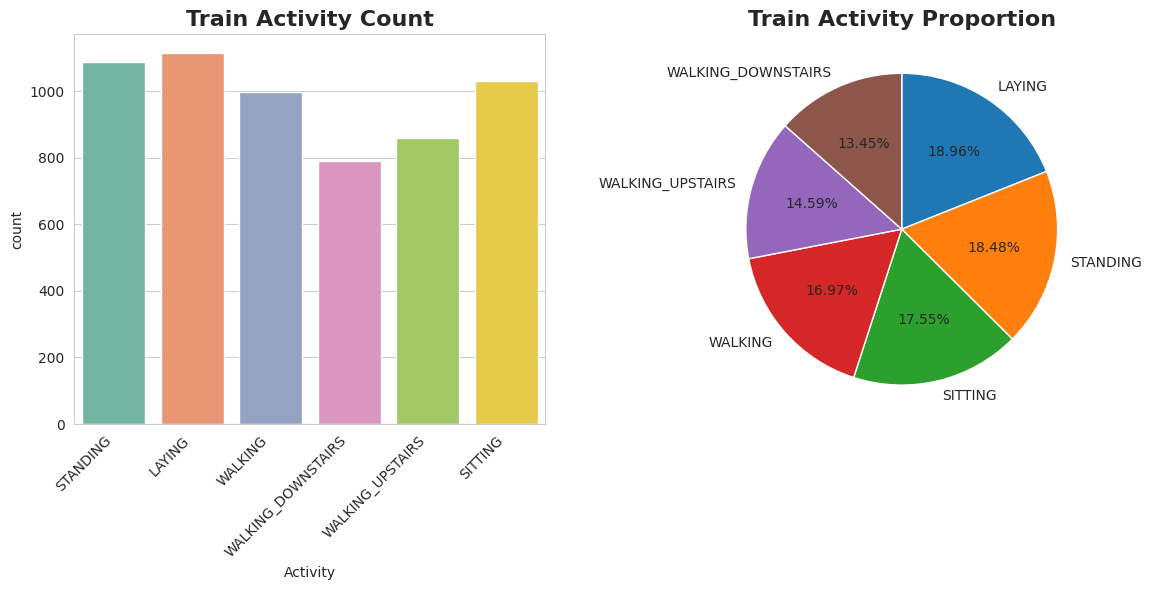

In [ ]:
# Train 데이터의 target 분포 시각화
plt.figure(figsize=(12, 6))
sns.set_style('whitegrid')

plt.subplot(1, 2, 1)
sns.countplot(x='Activity', data=df_train, hue='Activity', palette='Set2')
plt.title('Train Activity Count', fontsize=16, weight='bold')
plt.xticks(rotation=45, ha='right')

plt.subplot(1, 2, 2)
temp = df_train['Activity'].value_counts()
plt.pie(x=temp.values, labels=temp.index, autopct='%.2f%%', startangle=90, counterclock=False)
plt.title('Train Activity Proportion', fontsize=16, weight='bold')

plt.tight_layout()
plt.show()

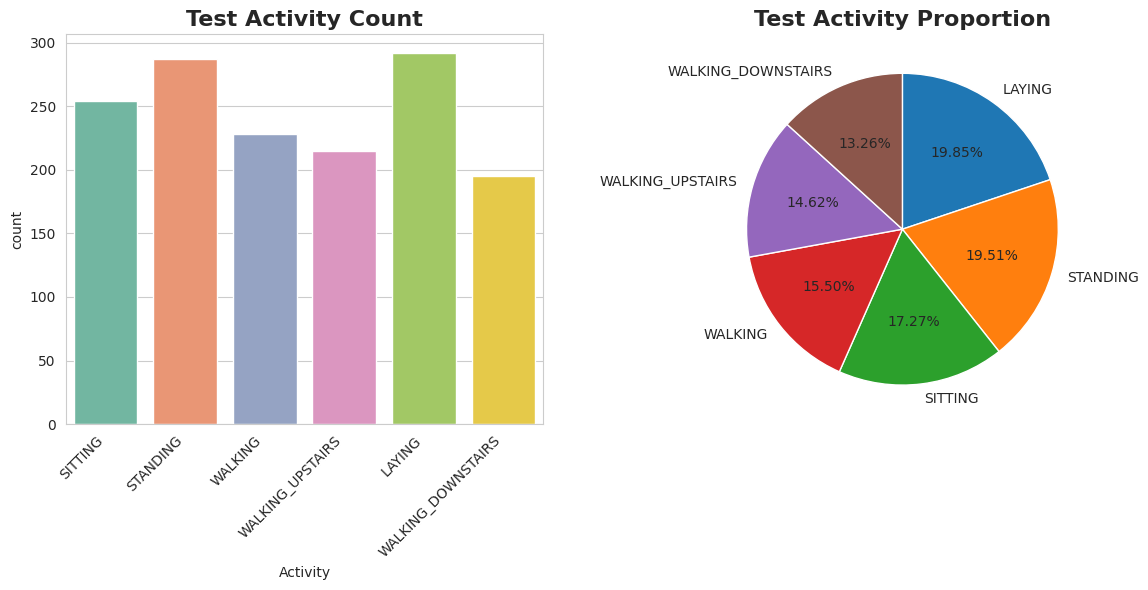

In [ ]:
# Test 데이터의 target 분포 시각화
plt.figure(figsize=(12, 6))
sns.set_style('whitegrid')

plt.subplot(1, 2, 1)
sns.countplot(x='Activity', data=df_test, hue='Activity', palette='Set2')
plt.title('Test Activity Count', fontsize=16, weight='bold')
plt.xticks(rotation=45, ha='right')

plt.subplot(1, 2, 2)
temp = df_test['Activity'].value_counts()
plt.pie(x=temp.values, labels=temp.index, autopct='%.2f%%', startangle=90, counterclock=False)
plt.title('Test Activity Proportion', fontsize=16, weight='bold')

plt.tight_layout()
plt.show()

📝 target 클래스 분포가 고릅니다.

In [ ]:
# 'sensor' 클래스 분포 확인(개수 기준)
print(df_features['sensor'].value_counts())

In [ ]:
# 'agg' 클래스 분포 확인(개수 기준)
print(df_features['agg'].value_counts())

In [ ]:
# 'axis' 클래스 분포 확인(개수 기준)
print(df_features['axis'].value_counts())

## **미션 1: 변수 중요도 확인**

**📌 변수 중요도**   
모델이 예측을 잘 하기 위해 어떤 변수를 얼마나 활용했는지를 수치로 표현한 것

### 기본 모델링

In [ ]:
# X, y 분리
X_train = df_train.drop('Activity', axis=1)
y_train = df_train['Activity']

# 학습용, 평가용 분리
from sklearn.model_selection import train_test_split
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.2, random_state=42)

💭 (사실 변수 중요도 분석이 목적이어서 굳이 train_test_split 하지 않아도 될 것 같은데 요구사항에 있어서 그냥 했습니다 !)

In [ ]:
# 1단계: 불러오기
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# 2단계: 선언하기
model = RandomForestClassifier(random_state=42)

# 3단계: 학습하기
model.fit(X_train, y_train)

# 4단계: 예측하기
y_pred = model.predict(X_val)

# 5단계: 평가하기
accuracy = accuracy_score(y_val, y_pred)
precision = precision_score(y_val, y_pred, average='macro')
recall = recall_score(y_val, y_pred, average='macro')
f1 = f1_score(y_val, y_pred, average='macro')

print(f"Accuracy: {accuracy}")
print(f"Precision: {precision}")
print(f"Recall: {recall}")
print(f"F1 score: {f1}")

Accuracy: 0.9804587935429057
Precision: 0.9794718623078492
Recall: 0.9803893605389393
F1 score: 0.9798739368843999


📝 `precision_score`, `recall_score`, `f1_score`는 기본값이 `binary`입니다.   
지금은 다중 분류 문제이므로 `average` 파라미터 지정이 필요합니다.   
→ 클래스 분포가 비교적 균등해 `average=macro`를 사용했습니다.

### 변수 중요도 추출

📝 변수 중요도는 `random_state`, 데이터셋, 하이퍼파라미터 등에 따라 바뀔 수 있습니다.   
하지만 **의미 있는 순서**는 유지되는 경향이 있습니다.

In [ ]:
# 변수 중요도 계산하기
importances = model.feature_importances_
features = X_train.columns
df_importance_6 = pd.DataFrame({'feature_name': features, 'feature_importance': importances})

# 변수 중요도 내림차순 정렬하기
df_importance_6.sort_values(by='feature_importance', ascending=False, inplace=True)
df_importance_6.reset_index(drop=True, inplace=True)

💭 (실습 자료에 제공된 함수와 동일한 내용입니다 !)

In [ ]:
# 변수 중요도 상위 9개
print(df_importance_6.head(9))

top_features = df_importance_6['feature_name'].head(9).tolist()
print(f"\nTop 9 important features:\n", top_features)

             feature_name  Importance
0    tGravityAcc-mean()-X    0.035434
1    angle(X,gravityMean)    0.032244
2     tGravityAcc-max()-X    0.029213
3    tGravityAcc-mean()-Y    0.027175
4     tGravityAcc-min()-X    0.024205
5     tGravityAcc-min()-Y    0.023930
6     tGravityAcc-max()-Y    0.023751
7  tGravityAcc-energy()-X    0.023343
8    angle(Y,gravityMean)    0.022725

Top 9 important features:
 ['tGravityAcc-mean()-X', 'angle(X,gravityMean)', 'tGravityAcc-max()-X', 'tGravityAcc-mean()-Y', 'tGravityAcc-min()-X', 'tGravityAcc-min()-Y', 'tGravityAcc-max()-Y', 'tGravityAcc-energy()-X', 'angle(Y,gravityMean)']


In [ ]:
# 변수 중요도 하위 9개
print(df_importance_6.tail(9))

bottom_features = df_importance_6['feature_name'].tail(9).tolist()
print(f"\nBottom 9 important features:\n", bottom_features)

                           feature_name  Importance
552      fBodyAcc-bandsEnergy()-33,48.1    0.000105
553                fBodyAccJerk-min()-Y    0.000101
554          tBodyAccJerk-arCoeff()-Y,1    0.000101
555                   fBodyAccMag-min()    0.000096
556               tBodyAccJerk-mean()-X    0.000095
557                      fBodyAcc-sma()    0.000093
558              tBodyGyroJerk-mean()-Y    0.000085
559             tBodyGyro-arCoeff()-X,3    0.000076
560  fBodyAccJerk-bandsEnergy()-57,64.2    0.000073

Bottom 9 important features:
 ['fBodyAcc-bandsEnergy()-33,48.1', 'fBodyAccJerk-min()-Y', 'tBodyAccJerk-arCoeff()-Y,1', 'fBodyAccMag-min()', 'tBodyAccJerk-mean()-X', 'fBodyAcc-sma()', 'tBodyGyroJerk-mean()-Y', 'tBodyGyro-arCoeff()-X,3', 'fBodyAccJerk-bandsEnergy()-57,64.2']


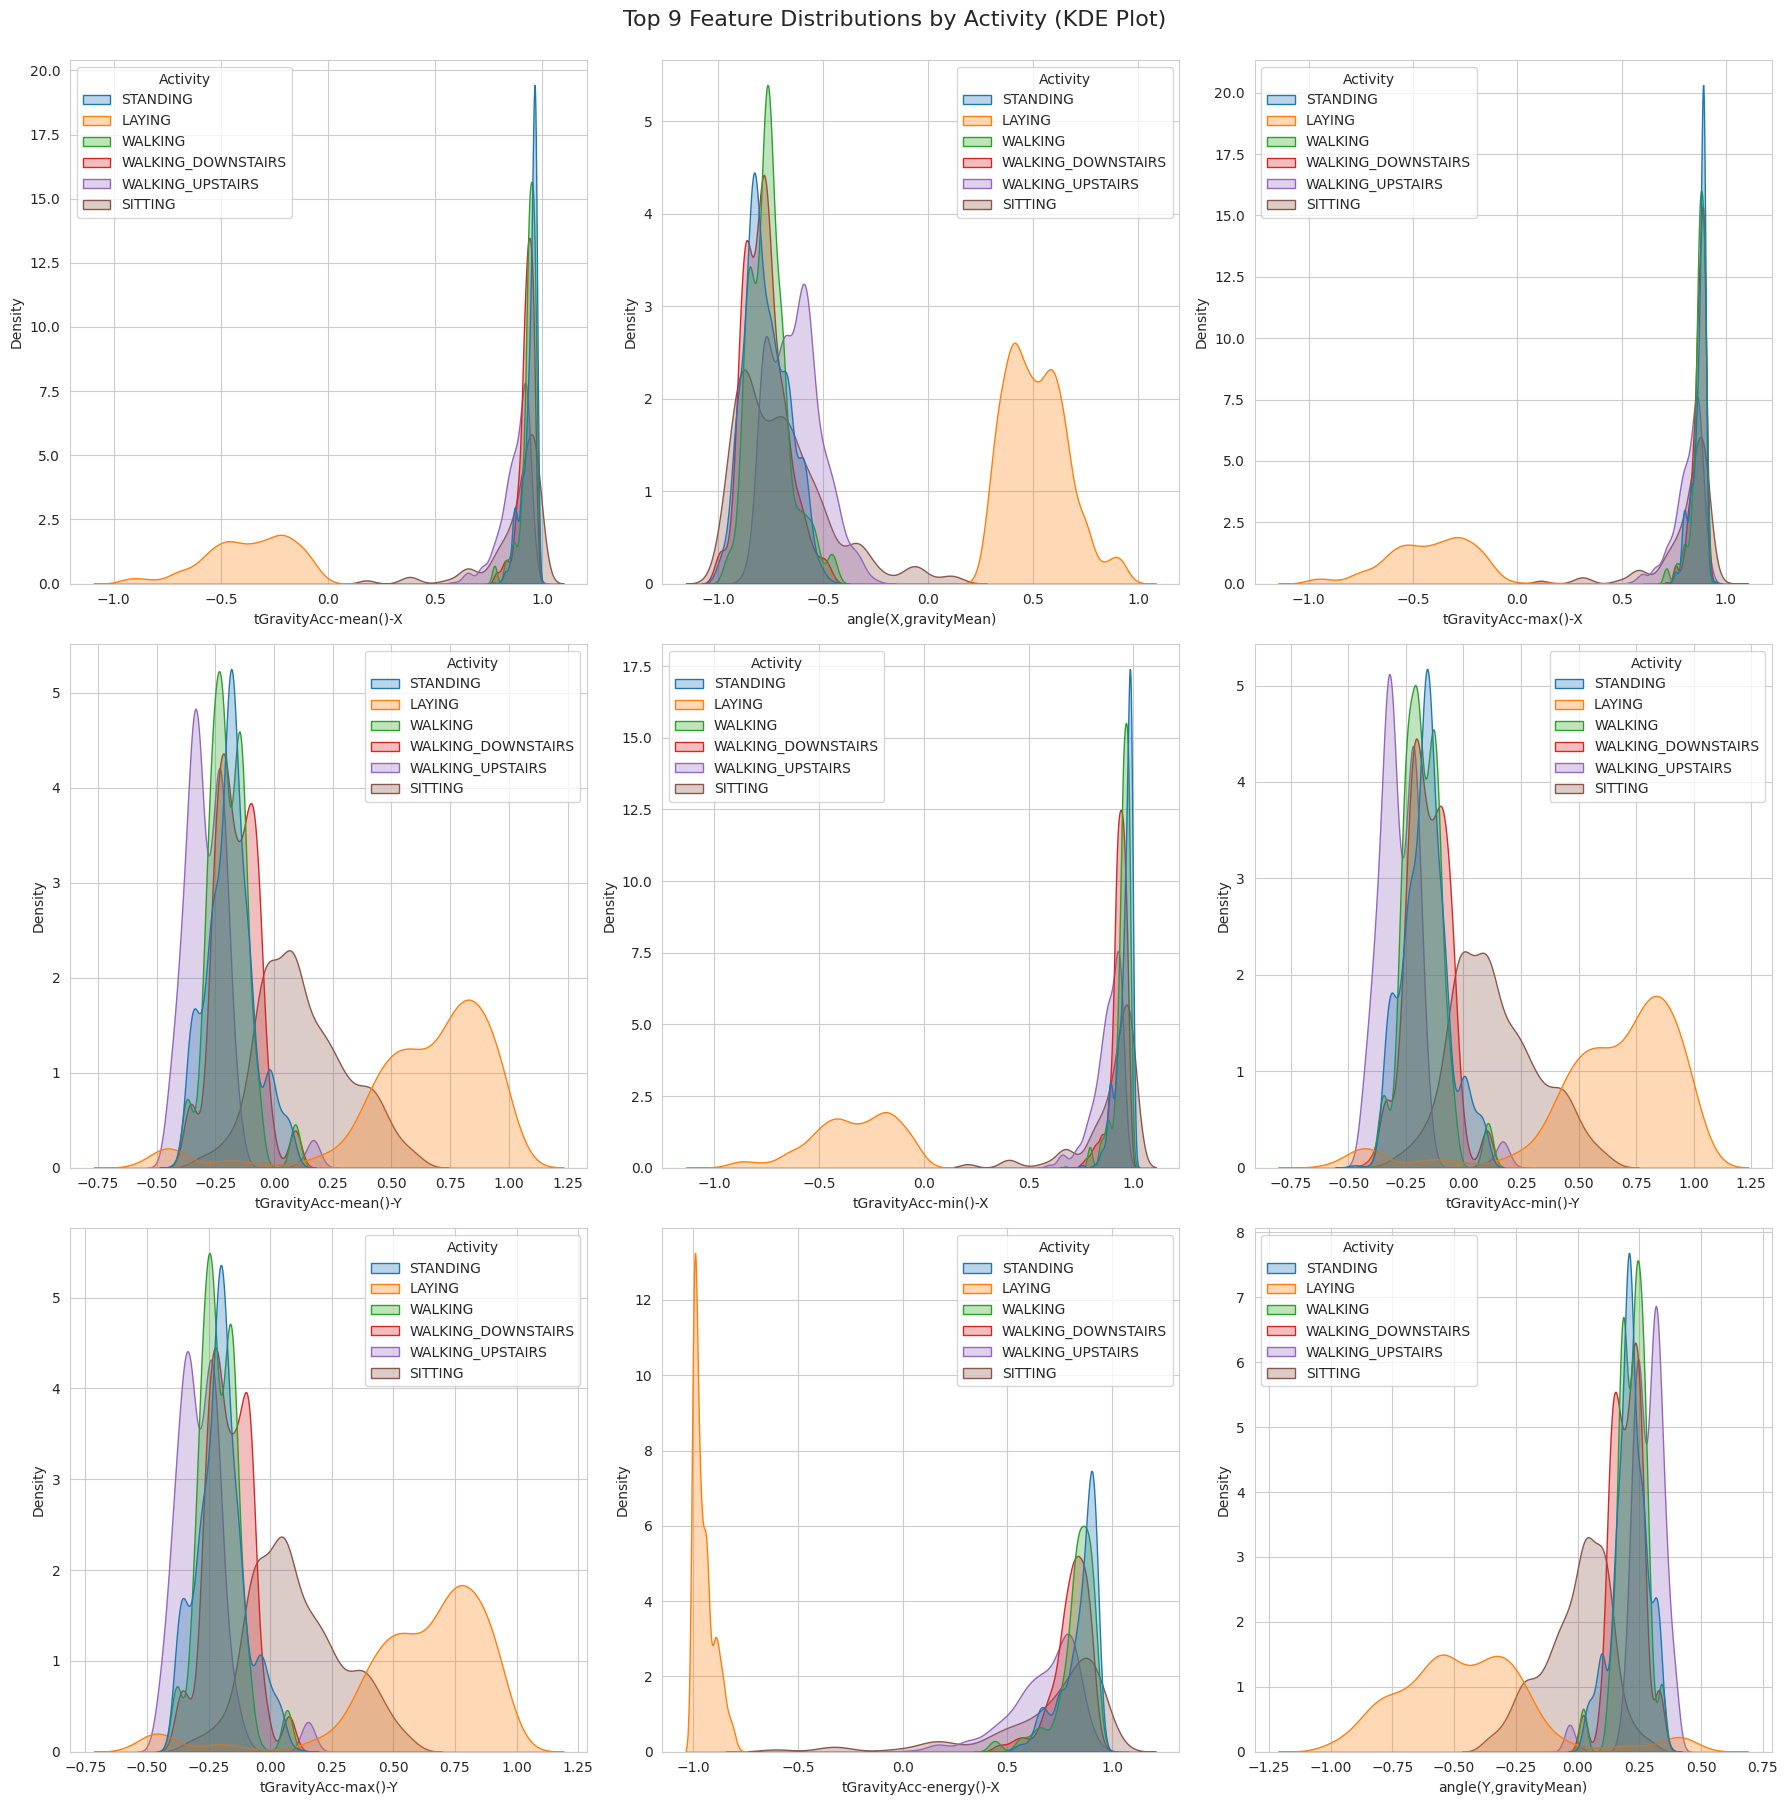

In [ ]:
# 변수 중요도 상위 9개 feature와 target의 관계 시각화
plt.figure(figsize=(18, 18))

for i, feature in enumerate(top_features):
    plt.subplot(3, 3, i + 1)
    sns.kdeplot(x=feature, data=df_train, hue='Activity', fill=True, common_norm=False, alpha=0.3)

plt.suptitle(f"Top 9 Feature Distributions by Activity (KDE Plot)", y=1, fontsize=16)
plt.tight_layout()
plt.show()

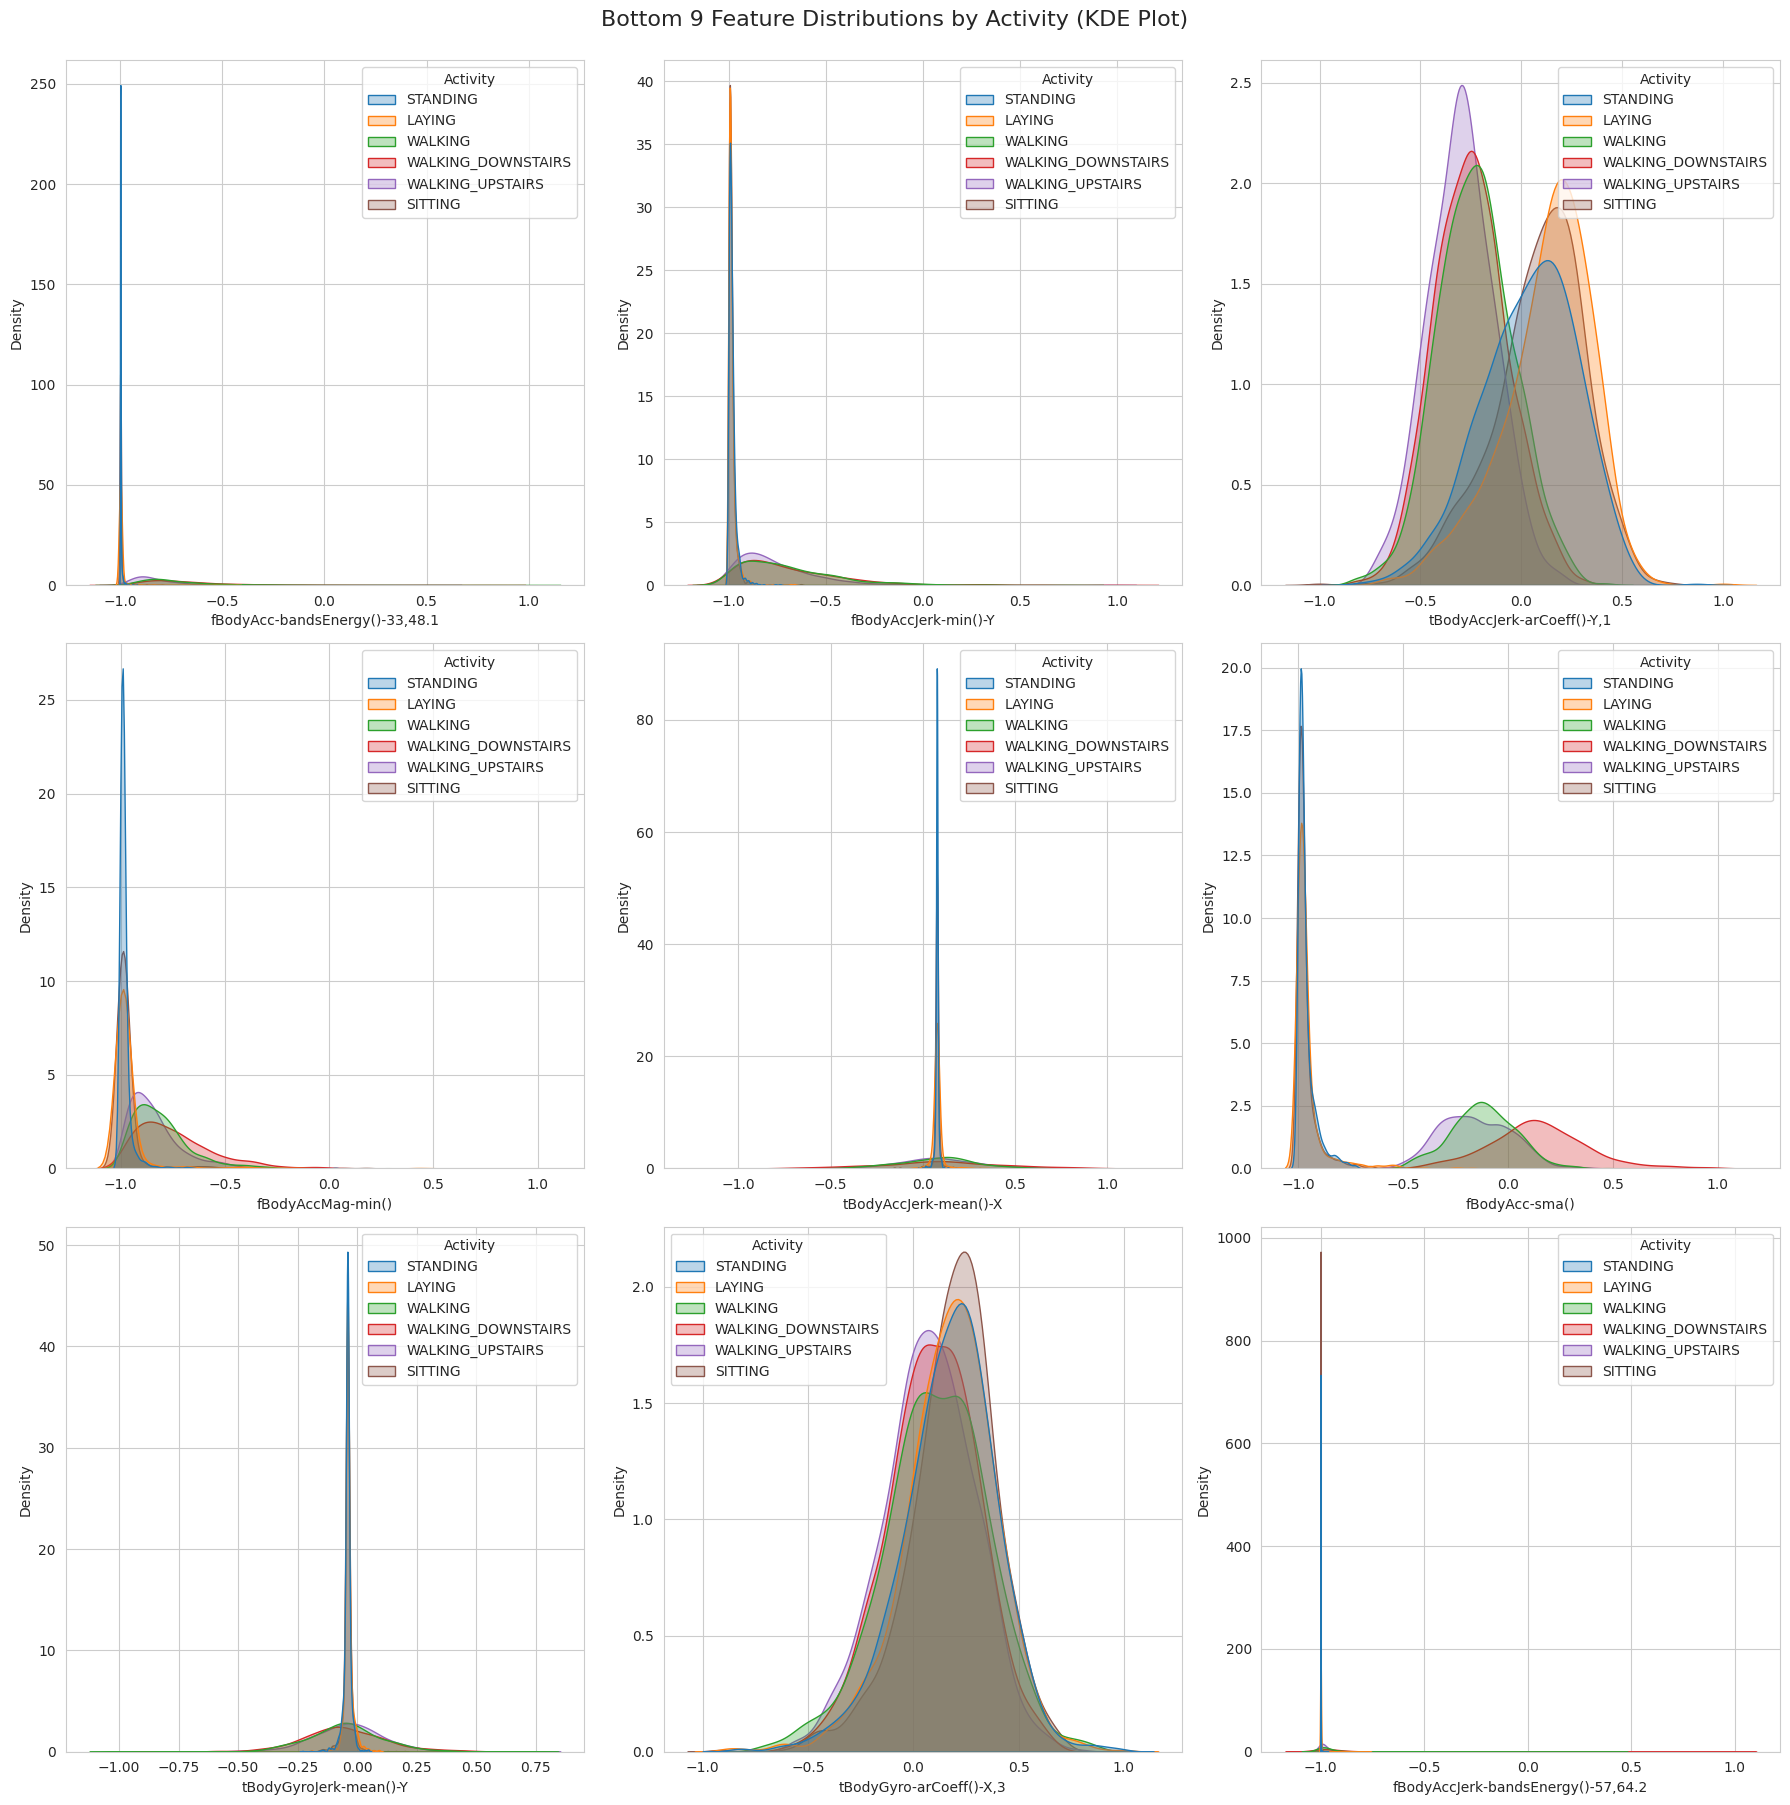

In [ ]:
# 변수 중요도 상위 9개 feature와 target의 관계 시각화
plt.figure(figsize=(18, 18))

for i, feature in enumerate(bottom_features):
    plt.subplot(3, 3, i + 1)
    sns.kdeplot(x=feature, data=df_train, hue='Activity', fill=True, common_norm=False, alpha=0.3)

plt.suptitle(f"Bottom 9 Feature Distributions by Activity (KDE Plot)", y=1, fontsize=16)
plt.tight_layout()
plt.show()

여기까지는 6개 행동을 구분하는 관점에서의 변수 중요도 추출이었습니다.

## **미션 2: 정적/동적 행동 구분**

📌 정적 행동: `STANDING`, `SITTING`, `LAYING`   
📌 동적 행동: `WALKING`, `WALKING_UPSTAIRS`, `WALKING_DOWNSTAIRS`

In [ ]:
# 정적(0) / 동적(1) 레이블 생성
df_train['is_dynamic'] = df_train['Activity'].apply(lambda x: 0 if x in ['STANDING', 'SITTING', 'LAYING'] else 1)
df_test['is_dynamic'] = df_test['Activity'].apply(lambda x: 0 if x in ['STANDING', 'SITTING', 'LAYING'] else 1)

display(df_train.head())
display(df_test.head())

,tBodyAcc-mean()-X,tBodyAcc-mean()-Y,tBodyAcc-mean()-Z,tBodyAcc-std()-X,tBodyAcc-std()-Y,tBodyAcc-std()-Z,tBodyAcc-mad()-X,tBodyAcc-mad()-Y,tBodyAcc-mad()-Z,tBodyAcc-max()-X,...,fBodyBodyGyroJerkMag-kurtosis(),"angle(tBodyAccMean,gravity)","angle(tBodyAccJerkMean),gravityMean)","angle(tBodyGyroMean,gravityMean)","angle(tBodyGyroJerkMean,gravityMean)","angle(X,gravityMean)","angle(Y,gravityMean)","angle(Z,gravityMean)",Activity,is_dynamic
0,0.288508,-0.009196,-0.103362,-0.988986,-0.962797,-0.967422,-0.989000,-0.962596,-0.965650,-0.929747,...,-0.816696,-0.042494,-0.044218,0.307873,0.072790,-0.601120,0.331298,0.165163,STANDING,0
1,0.265757,-0.016576,-0.098163,-0.989551,-0.994636,-0.987435,-0.990189,-0.993870,-0.987558,-0.937337,...,-0.693515,-0.062899,0.388459,-0.765014,0.771524,0.345205,-0.769186,-0.147944,LAYING,0
2,0.278709,-0.014511,-0.108717,-0.997720,-0.981088,-0.994008,-0.997934,-0.982187,-0.995017,-0.942584,...,-0.829311,0.000265,-0.525022,-0.891875,0.021528,-0.833564,0.202434,-0.032755,STANDING,0
3,0.289795,-0.035536,-0.150354,-0.231727,-0.006412,-0.338117,-0.273557,0.014245,-0.347916,0.008288,...,-0.408956,-0.255125,0.612804,0.747381,-0.072944,-0.695819,0.287154,0.111388,WALKING,1
4,0.394807,0.034098,0.091229,0.088489,-0.106636,-0.388502,-0.010469,-0.109680,-0.346372,0.584131,...,-0.563437,-0.044344,-0.845268,-0.974650,-0.887846,-0.705029,0.264952,0.137758,WALKING_DOWNSTAIRS,1


,tBodyAcc-mean()-X,tBodyAcc-mean()-Y,tBodyAcc-mean()-Z,tBodyAcc-std()-X,tBodyAcc-std()-Y,tBodyAcc-std()-Z,tBodyAcc-mad()-X,tBodyAcc-mad()-Y,tBodyAcc-mad()-Z,tBodyAcc-max()-X,...,fBodyBodyGyroJerkMag-kurtosis(),"angle(tBodyAccMean,gravity)","angle(tBodyAccJerkMean),gravityMean)","angle(tBodyGyroMean,gravityMean)","angle(tBodyGyroJerkMean,gravityMean)","angle(X,gravityMean)","angle(Y,gravityMean)","angle(Z,gravityMean)",Activity,is_dynamic
0,0.284379,-0.021981,-0.116683,-0.992490,-0.979640,-0.963321,-0.992563,-0.977304,-0.958142,-0.938850,...,-0.850065,-0.018043,0.092304,0.074220,-0.714534,-0.671943,-0.018351,-0.185733,SITTING,0
1,0.277440,-0.028086,-0.118412,-0.996620,-0.927676,-0.972294,-0.997346,-0.931405,-0.971788,-0.939837,...,-0.613367,-0.022456,-0.155414,0.247498,-0.112257,-0.826816,0.184489,-0.068699,STANDING,0
2,0.305833,-0.041023,-0.087303,0.006880,0.182800,-0.237984,0.005642,0.028616,-0.236474,0.016311,...,0.394388,-0.362616,0.171069,0.576349,-0.688314,-0.743234,0.272186,0.053101,WALKING,1
3,0.276053,-0.016487,-0.108381,-0.995379,-0.983978,-0.975854,-0.995877,-0.985280,-0.974907,-0.941425,...,-0.841455,0.289548,0.079801,-0.020033,0.291898,-0.639435,-0.111998,-0.123298,SITTING,0
4,0.271998,0.016904,-0.078856,-0.973468,-0.702462,-0.869450,-0.979810,-0.711601,-0.856807,-0.920760,...,0.214219,0.010111,0.114179,-0.830776,-0.325098,-0.840817,0.116237,-0.096615,STANDING,0


### 기본 모델링

In [ ]:
# X, y 분리
X_train = df_train.drop(['Activity', 'is_dynamic'], axis=1)
y_train = df_train['is_dynamic']

# 학습용, 평가용 분리
from sklearn.model_selection import train_test_split
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train,
                                                  test_size=0.2,
                                                  random_state=42)

In [ ]:
# 1단계: 불러오기
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# 2단계: 선언하기
model = RandomForestClassifier(random_state=42)

# 3단계: 학습하기
model.fit(X_train, y_train)

# 4단계: 예측하기
y_pred = model.predict(X_val)

# 5단계: 평가하기
accuracy = accuracy_score(y_val, y_pred)
precision = precision_score(y_val, y_pred)
recall = recall_score(y_val, y_pred)
f1 = f1_score(y_val, y_pred)

print(f"Accuracy: {accuracy}")
print(f"Precision: {precision}")
print(f"Recall: {recall}")
print(f"F1 score: {f1}")

Accuracy: 1.0
Precision: 1.0
Recall: 1.0
F1 score: 1.0


📝 지금은 이진 분류 문제이므로 `average` 파라미터를 지정하지 않았습니다.

In [ ]:
# 클래스 불균형 확인
print("클래스 분포:")
print(y_val.value_counts())
print("\n예측값 분포:")
print(pd.Series(y_pred).value_counts())

클래스 분포:
is_dynamic
0    657
1    520
Name: count, dtype: int64

예측값 분포:
0    657
1    520
Name: count, dtype: int64


💭 (평가 지표가 전부 1.0 나와서 걱정을 했는데요, 지피티한테 물어보니 정적/동적 행동은 실제로 센서 값이(특히 이동 관련 feature) 매우 다르게 나오기 때문에 모델이 거의 완벽하게 구분할 수 있다고 합니다 ! .....지피티 말이 맞겠죠...?)

### 변수 중요도 추출

In [ ]:
# 변수 중요도 계산하기
importances = model.feature_importances_
features = X_train.columns
df_importance_bin = pd.DataFrame({'feature_name': features, 'feature_importance': importances})

# 변수 중요도 내림차순 정렬하기
df_importance_bin.sort_values(by='feature_importance', ascending=False, inplace=True)
df_importance_bin.reset_index(drop=True, inplace=True)

In [ ]:
# 변수 중요도 상위 9개
print(df_importance_bin.head(9))

top_features = df_importance_bin['feature_name'].head(9).tolist()
print(f"\nTop 9 important features:\n", top_features)

                      feature_name  Importance
0            tBodyGyroJerk-iqr()-Z    0.069799
1             fBodyAccJerk-max()-X    0.060114
2  fBodyAccJerk-bandsEnergy()-1,16    0.050009
3             tBodyAccJerk-std()-X    0.049965
4             tBodyAccJerk-iqr()-X    0.040047
5         tBodyAccJerkMag-energy()    0.039919
6            fBodyAccJerk-mean()-X    0.039880
7             fBodyAcc-entropy()-X    0.039769
8             fBodyAccJerk-std()-X    0.030145

Top 9 important features:
 ['tBodyGyroJerk-iqr()-Z', 'fBodyAccJerk-max()-X', 'fBodyAccJerk-bandsEnergy()-1,16', 'tBodyAccJerk-std()-X', 'tBodyAccJerk-iqr()-X', 'tBodyAccJerkMag-energy()', 'fBodyAccJerk-mean()-X', 'fBodyAcc-entropy()-X', 'fBodyAccJerk-std()-X']


In [ ]:
# 변수 중요도 하위 9개
print(df_importance_bin.tail(9))

bottom_features = df_importance_bin['feature_name'].tail(9).tolist()
print(f"\nBottom 9 important features:\n", bottom_features)

                   feature_name  Importance
552   tGravityAccMag-arCoeff()3         0.0
553   tGravityAccMag-arCoeff()2         0.0
554   tGravityAccMag-arCoeff()1         0.0
555    tGravityAccMag-entropy()         0.0
556        tGravityAccMag-iqr()         0.0
557     tGravityAccMag-energy()         0.0
558        tGravityAccMag-min()         0.0
559        tGravityAccMag-max()         0.0
560  tBodyAccJerkMag-arCoeff()3         0.0

Bottom 9 important features:
 ['tGravityAccMag-arCoeff()3', 'tGravityAccMag-arCoeff()2', 'tGravityAccMag-arCoeff()1', 'tGravityAccMag-entropy()', 'tGravityAccMag-iqr()', 'tGravityAccMag-energy()', 'tGravityAccMag-min()', 'tGravityAccMag-max()', 'tBodyAccJerkMag-arCoeff()3']


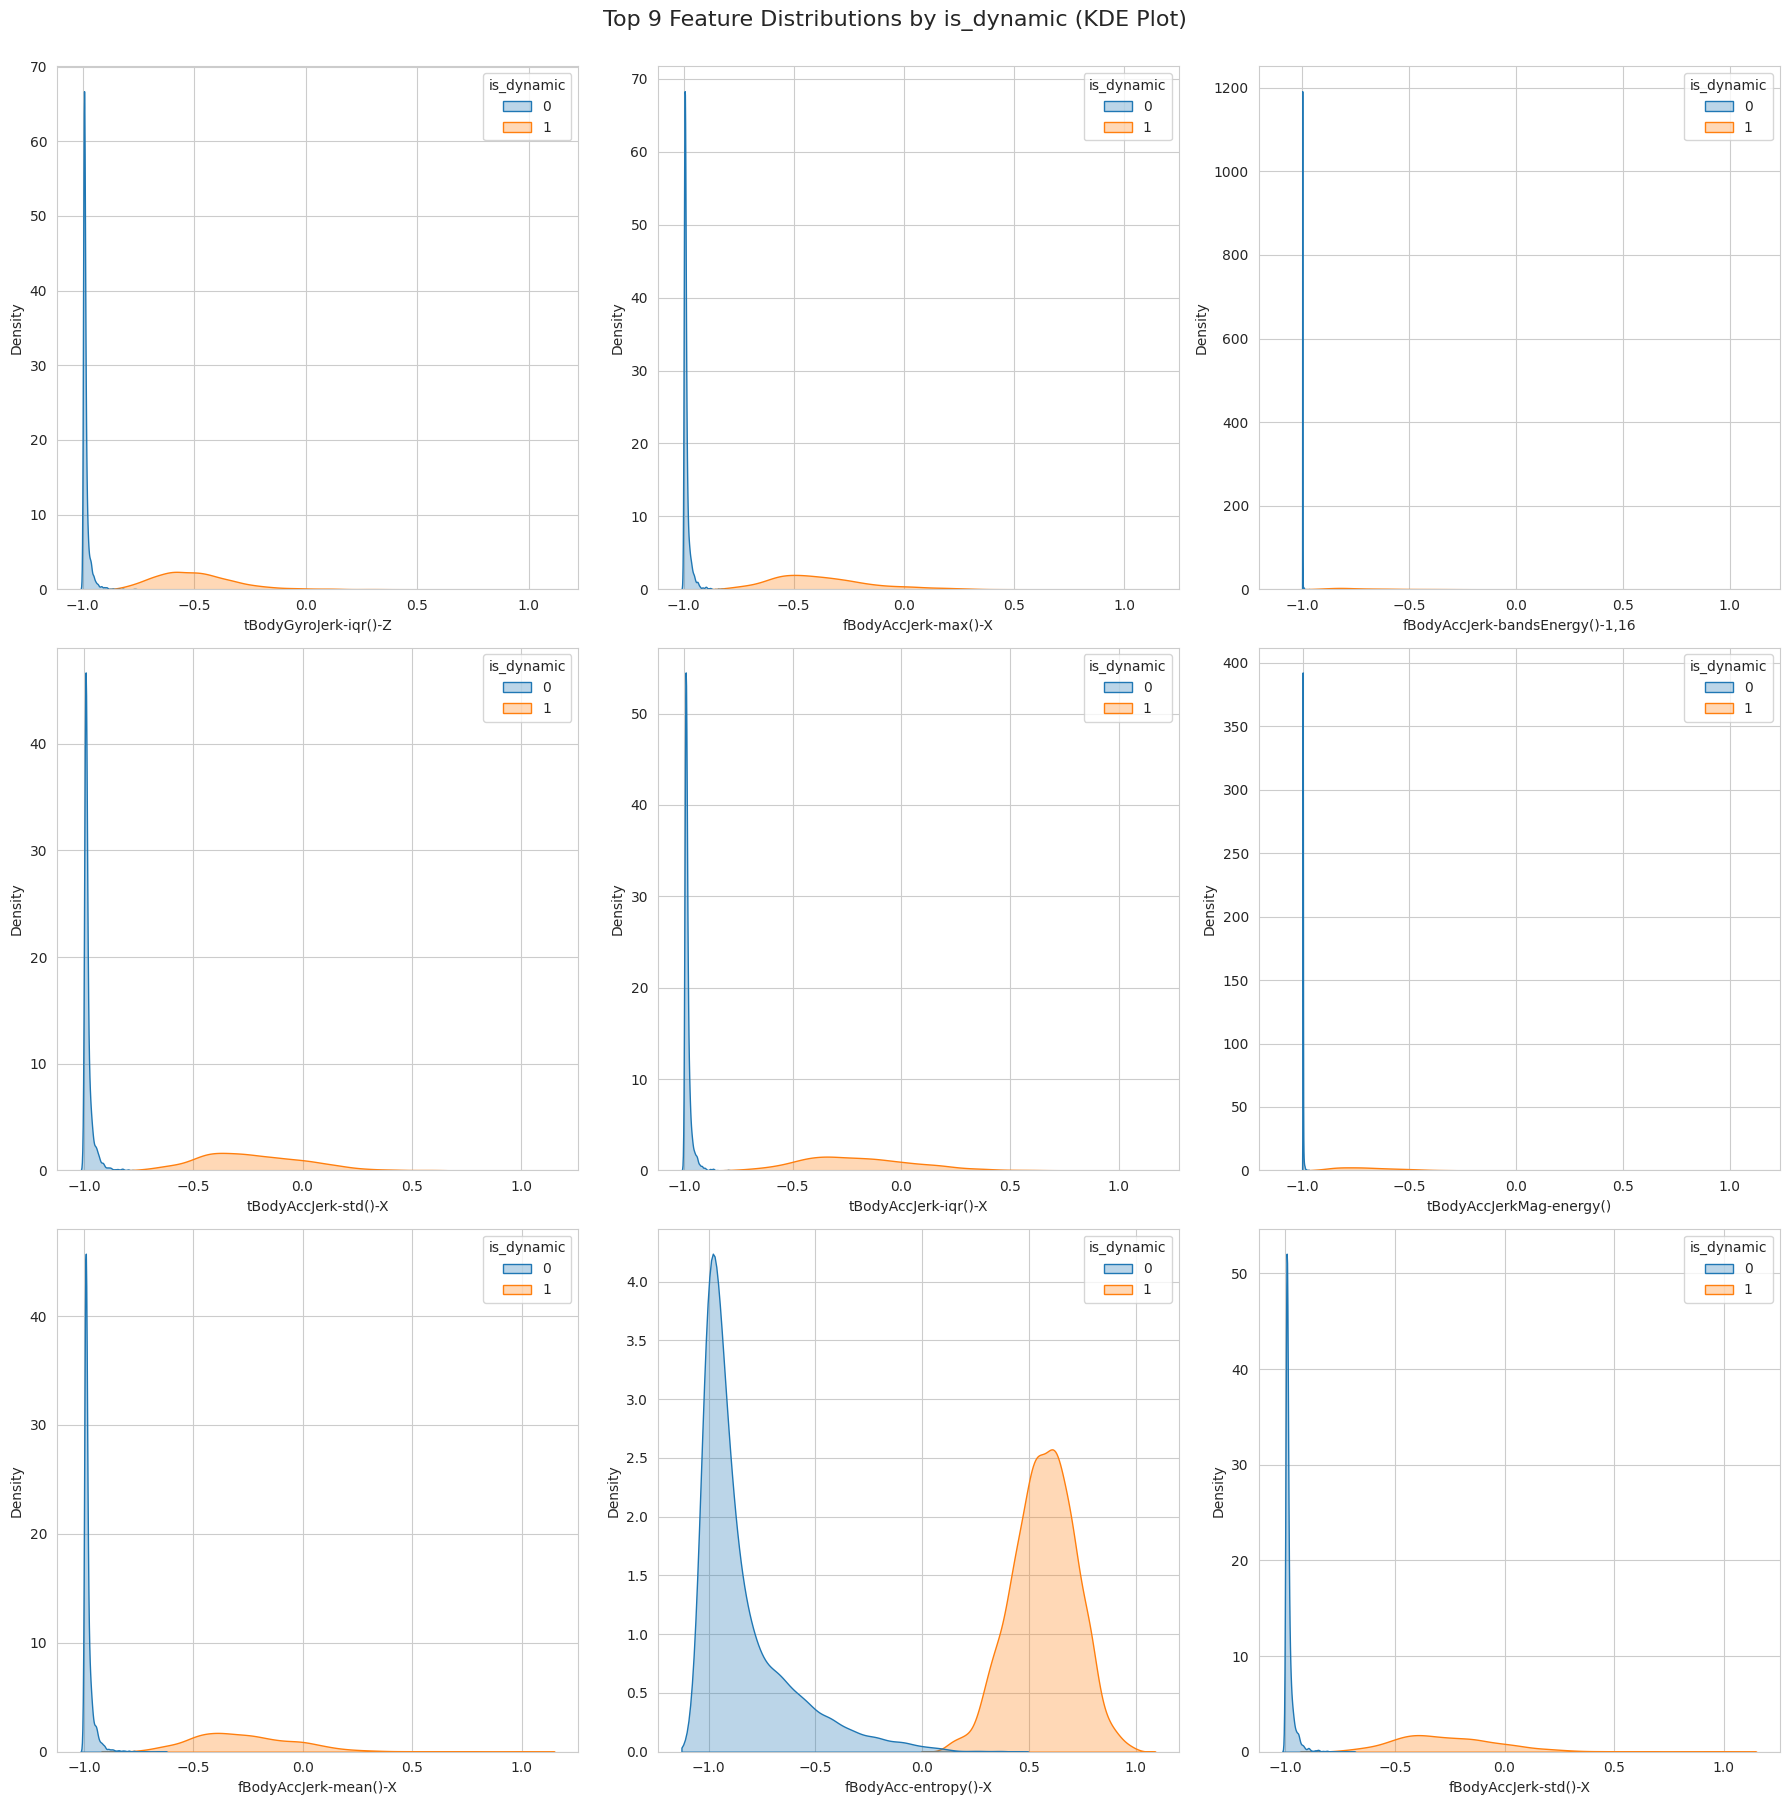

In [ ]:
# 변수 중요도 상위 9개 feature와 target의 관계 시각화
plt.figure(figsize=(18, 18))

for i, feature in enumerate(top_features):
    plt.subplot(3, 3, i + 1)
    sns.kdeplot(x=feature, data=df_train, hue='is_dynamic', fill=True, common_norm=False, alpha=0.3)

plt.suptitle(f"Top 9 Feature Distributions by is_dynamic (KDE Plot)", y=1, fontsize=16)
plt.tight_layout()
plt.show()

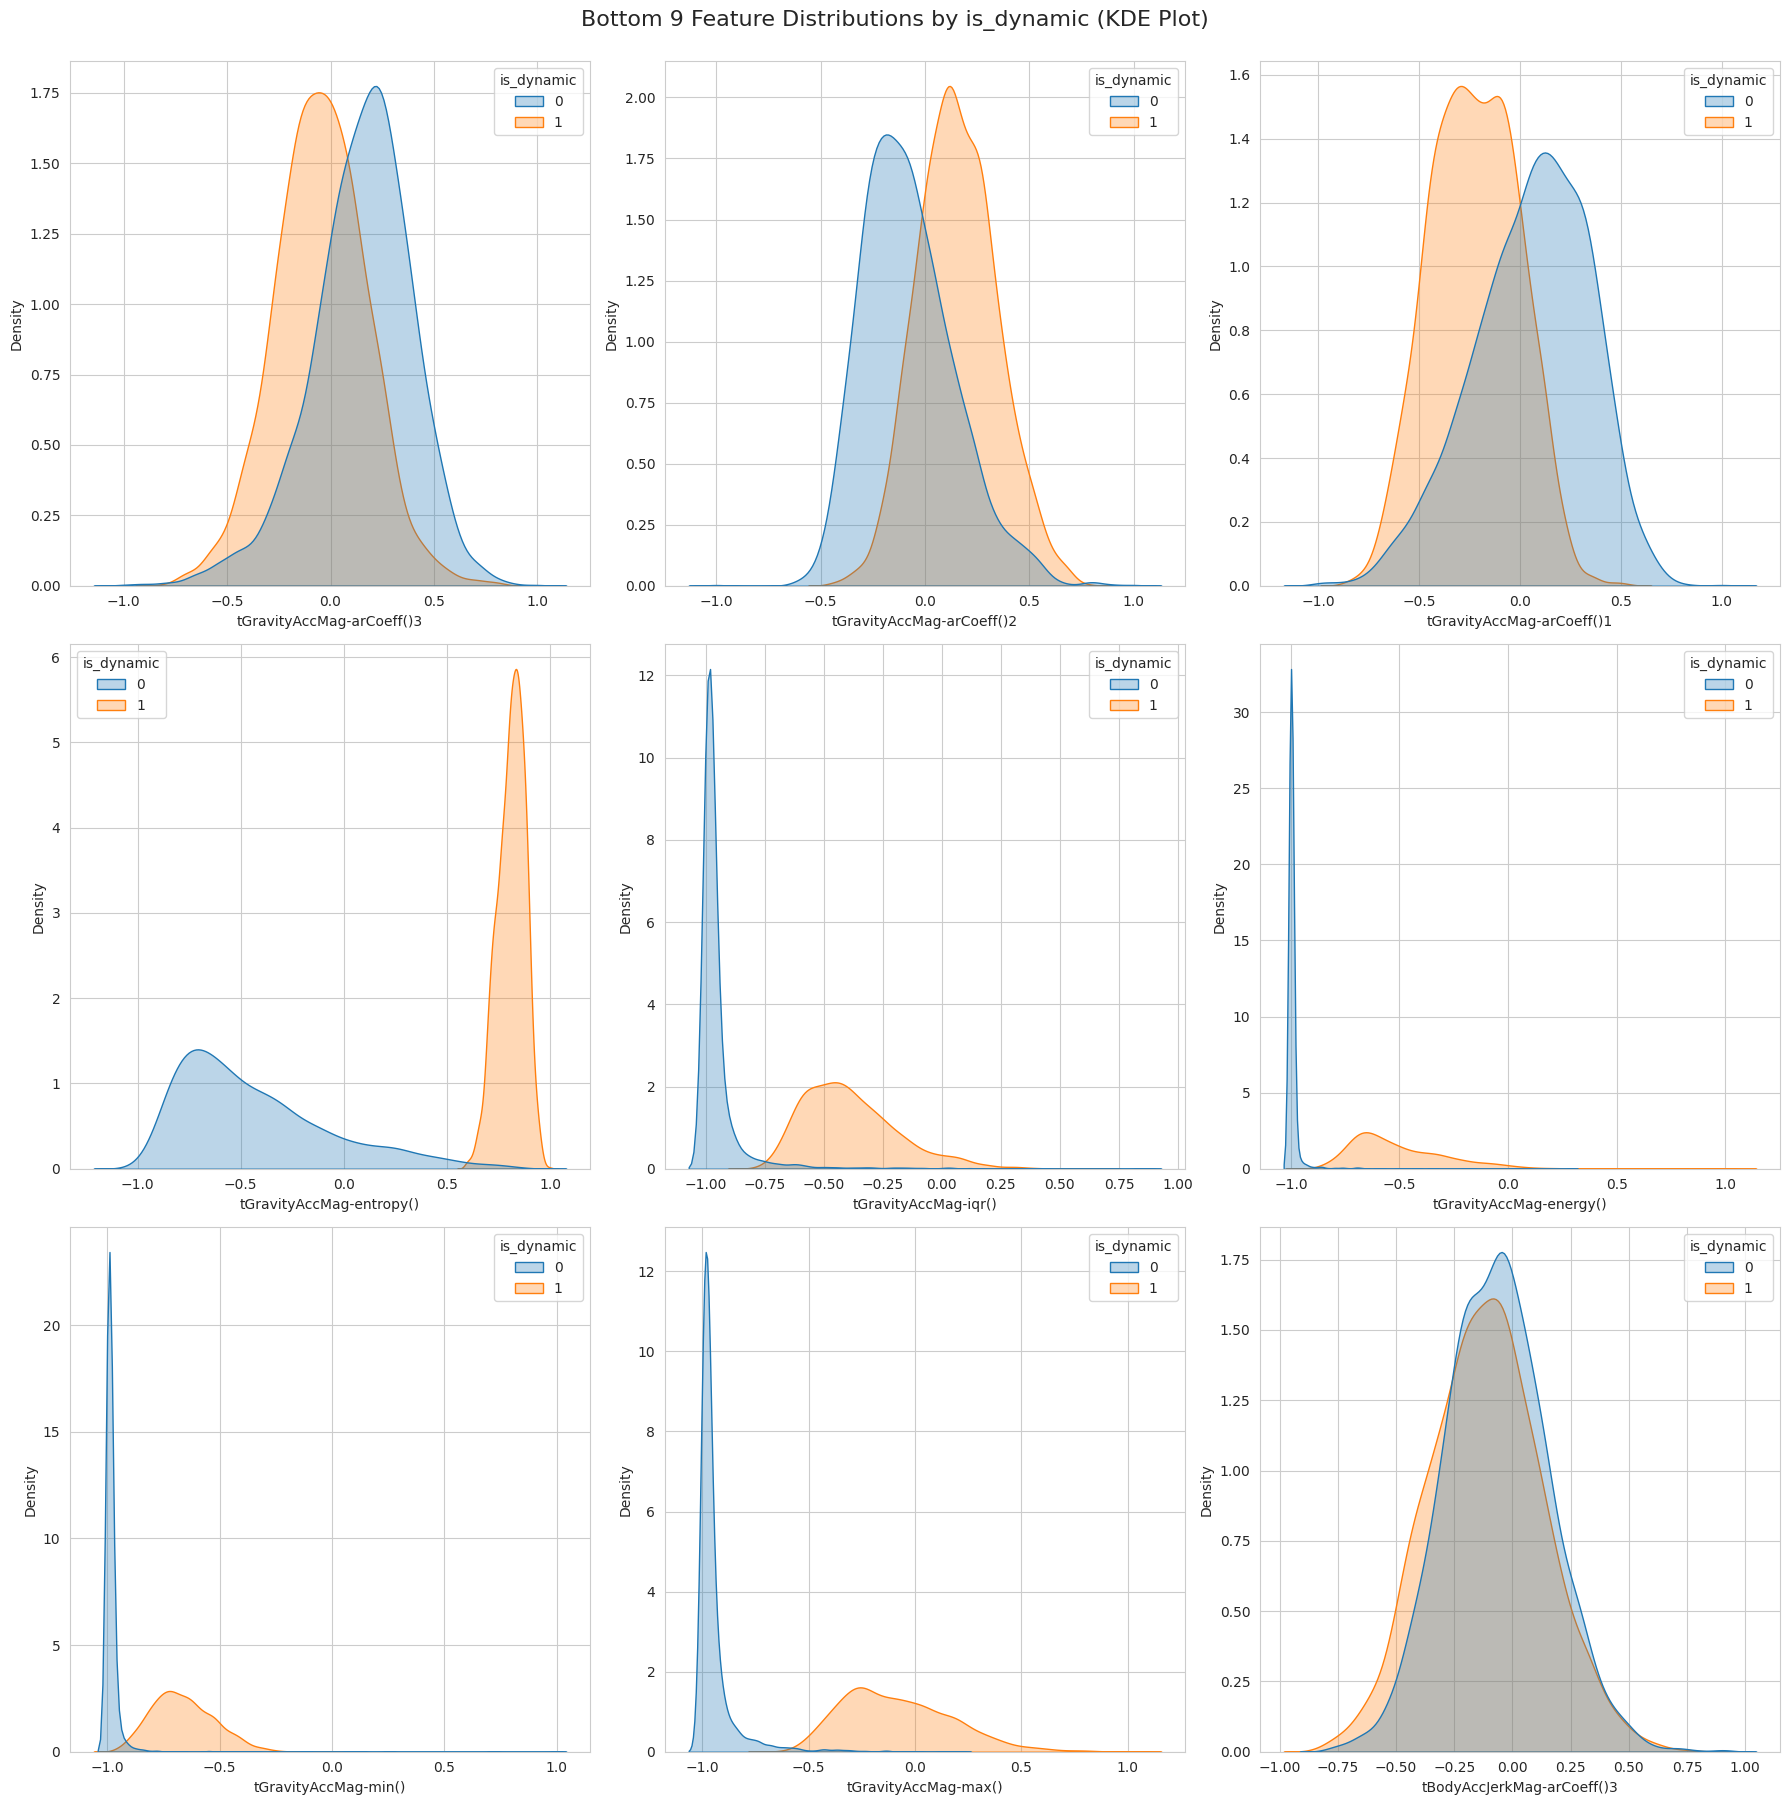

In [ ]:
# 변수 중요도 상위 9개 feature와 target의 관계 시각화
plt.figure(figsize=(18, 18))

for i, feature in enumerate(bottom_features):
    plt.subplot(3, 3, i + 1)
    sns.kdeplot(x=feature, data=df_train, hue='is_dynamic', fill=True, common_norm=False, alpha=0.3)

plt.suptitle(f"Bottom 9 Feature Distributions by is_dynamic (KDE Plot)", y=1, fontsize=16)
plt.tight_layout()
plt.show()

여기까지는 6개 행동의 두 분류, 즉 정적/동적 행동을 구분하는 관점에서의 변수 중요도 추출이었습니다.

## 변수 중요도 저장

In [ ]:
# 두 중요도 테이블 병합
df_merge = pd.merge(df_importance_6, df_importance_bin, on='feature_name')

# features.csv와 병합
df_final = pd.merge(df_features, df_merge, on='feature_name', how='left')

In [ ]:
display(df_features.head())
display(df_final.head())

,sensor,agg,axis,feature_name
0,tBodyAcc,mean(),X,tBodyAcc-mean()-X
1,tBodyAcc,mean(),Y,tBodyAcc-mean()-Y
2,tBodyAcc,mean(),Z,tBodyAcc-mean()-Z
3,tBodyAcc,std(),X,tBodyAcc-std()-X
4,tBodyAcc,std(),Y,tBodyAcc-std()-Y


,sensor,agg,axis,feature_name,Importance_x,Importance_y
0,tBodyAcc,mean(),X,tBodyAcc-mean()-X,0.000138,0.000017
1,tBodyAcc,mean(),Y,tBodyAcc-mean()-Y,0.000263,0.000000
2,tBodyAcc,mean(),Z,tBodyAcc-mean()-Z,0.000142,0.000009
3,tBodyAcc,std(),X,tBodyAcc-std()-X,0.004068,0.000059
4,tBodyAcc,std(),Y,tBodyAcc-std()-Y,0.000280,0.000022


In [ ]:
# 저장
joblib.dump(df_final, 'feature_importance_combined.pkl')

['feature_importance_combined.pkl']